In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time
from scipy.optimize import minimize

In [2]:
#Cargar las funciones a optimizar 

def funcion_ackley(x):
    """
    Calcula el valor de la función de Ackley para un vector de entrada dado.
    La función de Ackley es una función de prueba comúnmente utilizada para
    evaluar el rendimiento de los algoritmos de optimización. Tiene un único
    mínimo global en el origen.

    Parameters:
    ----------
    x : ndarray
        Vector de entrada en el que se evaluará la función de Ackley.

    Returns:
    ----------
    resultado : float
        Valor de la función de Ackley evaluada en el vector de entrada.
    """
    # Definir los parámetros y cálculos necesarios para la función de Ackley
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    
    # Calcular los términos de la función de Ackley
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    
    # Calcular el resultado final de la función de Ackley
    resultado = term1 + term2 + a + np.exp(1)
    
    # Devolver el resultado de la función de Ackley
    return resultado

def funcion_cuadratica(x):
    """
    Calcula el valor de una función cuadrática para un vector de entrada dado.
    Esta función cuadrática tiene una matriz de coeficientes cuadráticos definida 
    positiva, un vector de coeficientes lineales y un término constante.

    Parameters:
    ----------
    x : ndarray
        Vector de entrada en el que se evaluará la función cuadrática.

    Returns:
    ----------
    resultado : float
        Valor de la función cuadrática evaluada en el vector de entrada.
    """
    # Coeficientes cuadráticos
    A = np.array([[2, 1], [1, 2]])  # Matriz de coeficientes cuadráticos (positiva definida)
    # Coeficientes lineales
    C = np.array([-6, -4])  # Vector de coeficientes lineales
    # Término constante
    D = 10  # Término constante

    # Calcular el valor de la función cuadrática
    resultado = 0.5 * np.dot(x.T, np.dot(A, x)) + np.dot(C, x) + D
    return resultado



# Algoritmo de obtimización por ejambre de partículas (PSO) estándar

In [4]:

# Métodos que construyen el algoritmo de PSO
def initialize_particles(n_particulas, dimensiones, lim_inf, lim_sup):
    """
    Inicializa las posiciones y velocidades de las partículas en el algoritmo de optimización por enjambre de partículas (PSO).

    Parameters:
    ----------
    n_particulas : int
        Número de partículas en el enjambre.
    dimensiones : int
        Número de dimensiones del espacio de búsqueda.
    lim_inf : array
        Límite inferior del espacio de búsqueda para cada dimensión.
    lim_sup : array
        Límite superior del espacio de búsqueda para cada dimensión.

    Returns:
    ----------
    posiciones : array
        Posiciones iniciales de las partículas, con forma (n_particulas, dimensiones).
    velocidades : array
        Velocidades iniciales de las partículas, con forma (n_particulas, dimensiones).
    """
    # Asegurar que lim_inf y lim_sup sean arrays
    lim_inf = np.array(lim_inf)
    lim_sup = np.array(lim_sup)

    # Usa distribución uniforme
    # Inicializar posiciones de partículas dentro de los límites especificados creando una matriz
    posiciones = np.random.uniform(lim_inf, lim_sup, (n_particulas, dimensiones))
    # Inicializar velocidades de partículas dentro de un rango creando una matriz
    velocidades = np.random.uniform(-(lim_sup - lim_inf), lim_sup - lim_inf, (n_particulas, dimensiones))
    return posiciones, velocidades


def pso(funcion_aptitud, dimensiones, lim_inf, lim_sup, n_particulas=30, w=0.5, c1=1.5, c2=1.5, max_iter=100):
    """
    Implementa el algoritmo de optimización por enjambre de partículas (PSO) estándar.

    Parameters:
    ----------
    funcion_aptitud : callable
        Función objetivo que se quiere minimizar.
    dimensiones : int
        Número de dimensiones del espacio de búsqueda.
    lim_inf : array
        Límite inferior del espacio de búsqueda para cada dimensión.
    lim_sup : array
        Límite superior del espacio de búsqueda para cada dimensión.
    n_particulas : int, optional
        Número de partículas en el enjambre (por defecto es 30).
    w : float, optional
        Factor de inercia (por defecto es 0.5).
    c1 : float, optional
        Coeficiente cognitivo (atracción hacia la mejor posición personal, por defecto es 1.5).
    c2 : float, optional
        Coeficiente social (atracción hacia la mejor posición global, por defecto es 1.5).
    max_iter : int, optional
        Número máximo de iteraciones (por defecto es 100).

    Returns:
    ----------
    mejor_posicion_global : array
        Mejor posición global encontrada.
    mejor_valor_global : float
        Valor de la función objetivo en la mejor posición global encontrada.
    max_iter : int
        Número máximo de iteraciones.
    """
    # Inicialización de posiciones y velocidades
    posiciones, velocidades = initialize_particles(n_particulas, dimensiones, lim_inf, lim_sup)
    # Inicialización de las mejores posiciones personales y sus valores de aptitud
    pBest_posiciones = np.copy(posiciones)
    # Mejores Valores Personales: se evalúa la función objetivo en cada posición inicial en un array
    pBest_valores = np.array([funcion_aptitud(p) for p in posiciones])
    
    # Encuentra el índice de la partícula con el valor de aptitud más bajo (mejor).
    gBest_idx = np.argmin(pBest_valores)
    # accede a la fila del índice (gBest_idx) para tener la mejor posición
    gBest_posicion = pBest_posiciones[gBest_idx]
    # accede a la fila del índice (gBest_idx) para tener el valor del mejor punto de la función
    gBest_valor = pBest_valores[gBest_idx]
    
    # Iteración principal del PSO
    for iteracion in range(max_iter):
        for i in range(n_particulas):
            # Generar números aleatorios para las componentes cognitiva y social
            r1 = np.random.rand(dimensiones)
            r2 = np.random.rand(dimensiones)
            # Actualizar la velocidad de la partícula según la fórmula del PSO estándar
            velocidades[i] = (w * velocidades[i] + 
                              c1 * r1 * (pBest_posiciones[i] - posiciones[i]) + 
                              c2 * r2 * (gBest_posicion - posiciones[i]))
            # Actualizar la posición de la partícula
            posiciones[i] += velocidades[i]
            # Limitar las posiciones a los límites especificados
            posiciones[i] = np.clip(posiciones[i], lim_inf, lim_sup)
        
        # Evaluar la función objetivo y actualizar las mejores posiciones personales y globales
        for i in range(n_particulas):
            aptitud = funcion_aptitud(posiciones[i])
            # Actualizar la mejor posición personal (pBest) si la nueva posición es mejor
            if aptitud < pBest_valores[i]:
                pBest_posiciones[i] = posiciones[i]
                pBest_valores[i] = aptitud
                # Actualizar la mejor posición global (gBest) si la nueva posición es mejor
                if aptitud < gBest_valor:
                    gBest_posicion = posiciones[i]
                    gBest_valor = aptitud
                    
    return gBest_posicion, gBest_valor, max_iter

## Método que ejecuta cinco veces el modelo PSO estándar.

In [6]:
def calculo_result_enjambre(funcion,dimensiones, num_particulas, max_itera, lim_inf, lim_sup):
    
    """
    Calcula cinco resultados del enjambre de partículas utilizando el algoritmo PSO y recopila estadísticas de ejecución.

    Parameters:
    ----------
    funcion : callable
        Función objetivo que se quiere minimizar.
    dimensiones : int
        Número de dimensiones del espacio de búsqueda.
    num_particulas : int
        Número de partículas en el enjambre.
    max_itera : int
        Número máximo de iteraciones para el algoritmo PSO.
    lim_inf : float
        Límite inferior del espacio de búsqueda.
    lim_sup : float
        Límite superior del espacio de búsqueda.

    Returns:
    ----------
    df_resultados : DataFrame
        DataFrame con los resultados de las ejecuciones, incluyendo tiempos de ejecución y valores óptimos encontrados.
        Contiene una fila adicional con los promedios de los resultados.
    """
    lim_inf = np.array(lim_inf * dimensiones)
    lim_sup = np.array(lim_sup * dimensiones)
    
    #Inicialización de listas para almacenar los resultados
    tiempos_ejecucion = []
    run = []
    resultados_gradiente = []
    valores_optimos = []
    for i in range(1, 6):
        inicio = time.time()
        mejor_posicion, mejor_valor, num_iteracion = pso(funcion, dimensiones, lim_inf, lim_sup, n_particulas=num_particulas, w=0.5, c1=1.5, c2=1.5, max_iter=max_itera)
        fin = time.time()
        
        # Almacenar los resultados en las listas
        tiempos_ejecucion.append(fin - inicio)
        run.append(i)
        valores_optimos.append(mejor_valor)
        
     # Crear el DataFrame con los datos recopilados
    df = pd.DataFrame({
        'Run' : run,
        'Tiempo_estandar': tiempos_ejecucion,
        'valor_optimo_estandar': valores_optimos
    })
    
    # Calcular los promedios
    promedios = {
        'Run': 'Media',
        'Tiempo_estandar': np.mean(tiempos_ejecucion),
        'valor_optimo_estandar': np.mean(valores_optimos)
    }
    
    # Crear un DataFrame para la fila de promedios
    df_promedios = pd.DataFrame([promedios])    
    # Agregar la fila de promedios al DataFrame original usando pd.concat
    #df = pd.concat([df, df_promedios], ignore_index=True)
    return pd.concat([df, df_promedios], ignore_index=True)

#calculo_result_enjambre(funcion_ackley,1, 30, 100, -100, 100)

# Algoritmo de obtimización por ejambre de partículas en 6 particiones con paralelización

In [8]:
from Clase_paralelizacion import Paralelizacion

def calculo_paralelizacion(dimensiones, lim_inf, lim_sup, n_subregiones, funcion, n_particulas, n_iteraciones):
    """
    Calcula 5 resultados de el método de Paralelización de la clase " "

    Parameters:
    ----------
    dimensiones : int
        Número de dimensiones del espacio de búsqueda.
    lim_inf : float
        Límite inferior del espacio de búsqueda.
    lim_sup : float
        Límite superior del espacio de búsqueda.
    n_subregiones : int
        Número de subregiones en las que se divide el espacio de búsqueda para la paralelización.
    funcion : callable
        Función objetivo que se quiere minimizar.
    n_particulas : int
        Número de partículas en el enjambre.
    n_iteraciones : int
        Número máximo de iteraciones para el algoritmo PSO.

    Returns:
    ----------
    df_resultados : DataFrame
        DataFrame con los resultados de las ejecuciones paralelas, incluyendo tiempos de ejecución y valores óptimos encontrados.
        Contiene una fila adicional con los promedios de los resultados.
    """
    #Inicialización de listas para almacenar los resultados
    tiempos_ejecucion = []
    run = []
    valores_optimos = []
    
    for i in range(1, 6):
        if __name__ == '__main__':
            paralelizacion = Paralelizacion(dimensiones, lim_inf, lim_sup, n_subregiones, funcion)
            valor, tiempo = paralelizacion.ejecutar_optimizacion(n_particulas, n_iteraciones)
        # Almacenar los resultados en las listas
        tiempos_ejecucion.append(tiempo)
        run.append(i)
        valores_optimos.append(valor)
        
    # Crear el DataFrame con los datos recopilados
    df = pd.DataFrame({
        'Run' : run,
        'Tiempo_parale': tiempos_ejecucion,
        'valor_optimo_parale': valores_optimos
    })
    
    # Calcular los promedios
    promedios = {
        'Run': 'Media',
        'Tiempo_parale': np.mean(tiempos_ejecucion),
        'valor_optimo_parale': np.mean(valores_optimos)
    }
    
    # Crear un DataFrame para la fila de promedios
    df_promedios = pd.DataFrame([promedios])    
    # Agregar la fila de promedios al DataFrame original usando pd.concat
    return pd.concat([df, df_promedios], ignore_index=True)        

# Algoritmo de Descenso del Gradiente

In [10]:
def caluculo_result_gradiente(lim_inf, lim_sup,dimensiones, funcion_optimizar):
    """
    Realiza la ejecución de 5 veces el método minimize de la librería scipy, dada una función, minimze usa el método BFGS y recopila estadísticas de ejecución.

    Parameters:
    ----------
    lim_inf : float
        Límite inferior del espacio de búsqueda.
    lim_sup : float
        Límite superior del espacio de búsqueda.
    dimensiones : int
        Número de dimensiones del espacio de búsqueda.
    funcion_optimizar : callable
        Función objetivo que se quiere minimizar.

    Returns:
    ----------
    df_resultados : DataFrame
        DataFrame con los resultados de las ejecuciones utilizando el método BFGS, incluyendo tiempos de ejecución y valores óptimos encontrados.
        Contiene una fila adicional con los promedios de los resultados.
    """
    x0 = np.random.uniform(lim_inf, lim_sup, dimensiones)
    
    #Inicialización de listas para almacenar los resultados
    tiempos_ejecucion = []
    run = []
    valores_optimos = []
    
    # Bucle para realizar las optimizaciones y almacenar los resultados
    for i in range(1, 6):
        inicio_gradiente = time.time()
        resultado_gradiente = minimize(funcion_optimizar, x0, method='BFGS')
        fin_gradiente = time.time()
        
        # Almacenar los resultados en las listas
        tiempos_ejecucion.append(fin_gradiente - inicio_gradiente)
        run.append(i)
        valores_optimos.append(funcion_optimizar(resultado_gradiente.x))
    
    # Crear el DataFrame con los datos recopilados
    df = pd.DataFrame({
        'Run' : run,
        'Tiempo_gradiente': tiempos_ejecucion,
        'valor_optimo_gradiente': valores_optimos
    })
    
    # Calcular los promedios
    promedios = {
        'Run': 'Media',
        'Tiempo_gradiente': np.mean(tiempos_ejecucion),
        'valor_optimo_gradiente': np.mean(valores_optimos)
    }
    
    # Crear un DataFrame para la fila de promedios
    df_promedios = pd.DataFrame([promedios])    
    # Agregar la fila de promedios al DataFrame original usando pd.concat
    #df = pd.concat([df, df_promedios], ignore_index=True)
    return pd.concat([df, df_promedios], ignore_index=True)

#caluculo_result_gradiente(-10, 10, 1, funcion_esfera)

## Métodos para graficar en 2D

In [12]:
def pso(funcion_aptitud, dimensiones, lim_inf, lim_sup, n_particulas=30, w=0.5, c1=1.5, c2=1.5, max_iter=100):
    """
    Implementa el algoritmo PSO estándar, pero se le agregan como etiquetas en ciertos puntos para 

    Parameters:
    ----------
    funcion_aptitud : callable
        Función objetivo que se quiere minimizar.
    dimensiones : int
        Dimensiones del espacio de búsqueda.
    lim_inf : array
        Límite inferior del espacio de búsqueda.
    lim_sup : array
        Límite superior del espacio de búsqueda.
    n_particulas : int, optional
        Número de partículas (por defecto es 30).
    w : float, optional
        Factor de inercia (por defecto es 0.5).
    c1 : float, optional
        Coeficiente cognitivo (por defecto es 1.5).
    c2 : float, optional
        Coeficiente social (por defecto es 1.5).
    max_iter : int, optional
        Número máximo de iteraciones (por defecto es 100).

    Returns:
    ----------
    mejor_posicion_global : array
        Mejor posición global encontrada.
    mejor_valor_global : float
        Valor de la función objetivo en la mejor posición global encontrada.
    history : dict
        Diccionario con las posiciones de las partículas en las iteraciones inicial, media y final.
    """
    posiciones, velocidades = initialize_particles(n_particulas, dimensiones, lim_inf, lim_sup)
    pBest_posiciones = np.copy(posiciones)
    pBest_valores = np.array([funcion_aptitud(p) for p in posiciones])
    gBest_idx = np.argmin(pBest_valores)
    gBest_posicion = pBest_posiciones[gBest_idx]
    gBest_valor = pBest_valores[gBest_idx]
    
    history = {"iter_0": np.copy(posiciones)}
    
    for iteracion in range(max_iter):
        for i in range(n_particulas):
            r1 = np.random.rand(dimensiones)
            r2 = np.random.rand(dimensiones)
            velocidades[i] = (w * velocidades[i] + 
                              c1 * r1 * (pBest_posiciones[i] - posiciones[i]) + 
                              c2 * r2 * (gBest_posicion - posiciones[i]))
            posiciones[i] += velocidades[i]
            posiciones[i] = np.clip(posiciones[i], lim_inf, lim_sup)
        
        for i in range(n_particulas):
            aptitud = funcion_aptitud(posiciones[i])
            if aptitud < pBest_valores[i]:
                pBest_posiciones[i] = posiciones[i]
                pBest_valores[i] = aptitud
                if aptitud < gBest_valor:
                    gBest_posicion = posiciones[i]
                    gBest_valor = aptitud
        
        if iteracion == max_iter // 2:
            history["iter_half"] = np.copy(posiciones)
    
    history["iter_final"] = np.copy(posiciones)
    return gBest_posicion, gBest_valor, history


# Graficar la función de aptitud
def plot_function(ax, funcion_aptitud, lim_inf, lim_sup):
    """
    Grafica la función de aptitud en un espacio bidimensional.

    Parameters:
    ----------
    ax : Axes
        Eje de Matplotlib sobre el que se dibujará el gráfico.
    funcion_aptitud : callable
        Función objetivo que se desea graficar. Debe aceptar un array de dos dimensiones como entrada.
    lim_inf : array
        Límite inferior del espacio de búsqueda para ambas dimensiones.
    lim_sup : array
        Límite superior del espacio de búsqueda para ambas dimensiones.
    """
    x = np.linspace(lim_inf[0], lim_sup[0], 100)
    y = np.linspace(lim_inf[1], lim_sup[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([funcion_aptitud(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)
    plt.colorbar(contour, ax=ax)

# Comparación Función Cuadrática: valor óptimo = 2/3

## Gráfica de la función en 2 dimensiones aproximada por el algoritmo PSO

Mejor posición: [2.66725245 0.66939807]
Mejor valor: 0.6666674935641677


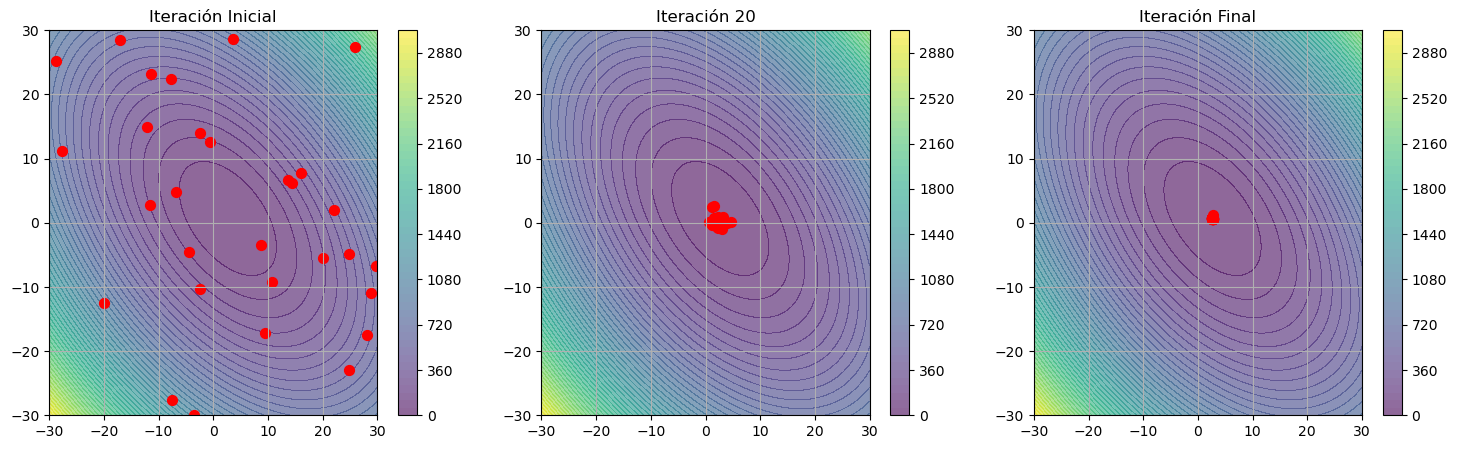

In [15]:
dimensiones = 2  # Usamos 2 dimensiones para poder graficar
lim_inf = np.array([-30] * dimensiones)
lim_sup = np.array([30] * dimensiones)
max_iter = 40  # Define el número máximo de iteraciones

mejor_posicion, mejor_valor, history = pso(funcion_cuadratica, dimensiones, lim_inf, lim_sup, max_iter=max_iter)

print("Mejor posición:", mejor_posicion)
print("Mejor valor:", mejor_valor)

# Graficar posiciones de partículas en iteraciones seleccionadas junto con la función
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_particles(ax, posiciones, iteracion):
    """
    Grafica la función de aptitud junto con las posiciones de las partículas en una iteración específica del algoritmo PSO.

    Parameters:
    ----------
    ax : Axes
        Objeto de eje de Matplotlib sobre el cual se realizará el gráfico.
    posiciones : array
        Matriz de posiciones de las partículas en el espacio de búsqueda para una iteración específica.
    iteracion : str
        Etiqueta que indica la iteración correspondiente, por ejemplo, 'Inicial', 'Mitad' o 'Final'.
    """
    plot_function(ax, funcion_cuadratica, lim_inf, lim_sup)
    ax.scatter(posiciones[:, 0], posiciones[:, 1], c='red', marker='o', s=50)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_title(f'Iteración {iteracion}')
    ax.grid(True)

plot_particles(axes[0], history["iter_0"], 'Inicial')
plot_particles(axes[1], history["iter_half"], f'{max_iter // 2}')
plot_particles(axes[2], history["iter_final"], 'Final')

plt.show()


Mejor posición: [2.66620946 0.6667247 ]
Mejor valor: 0.6666667119763598


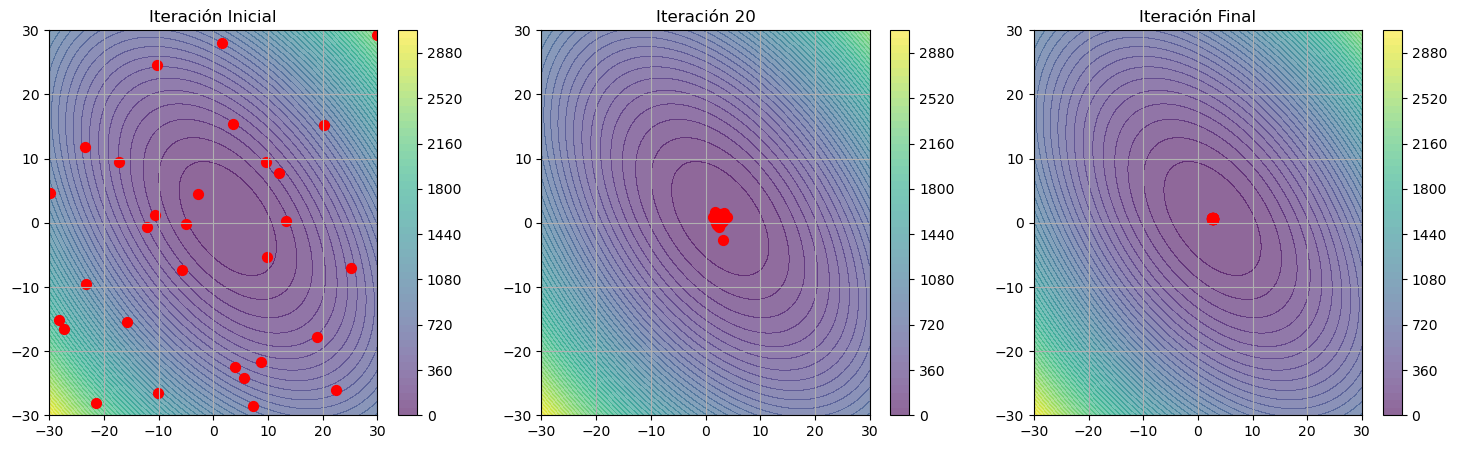

In [16]:
# Assistant
# Definir las dimensiones y los límites para graficar
dimensiones = 2  
lim_inf = np.array([-30] * dimensiones)
lim_sup = np.array([30] * dimensiones)
max_iter = 40  # Número máximo de iteraciones

# Ejecutar el algoritmo PSO para encontrar la mejor posición y valor
mejor_posicion, mejor_valor, history = pso(funcion_cuadratica, dimensiones, lim_inf, lim_sup, max_iter=max_iter)

# Imprimir la mejor posición y valor encontrados
print("Mejor posición:", mejor_posicion)
print("Mejor valor:", mejor_valor)

# Graficar posiciones de partículas en iteraciones seleccionadas junto con la función
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Función para graficar las posiciones de las partículas en una iteración específica
def plot_particles(ax, posiciones, iteracion): #ya se documentó
    plot_function(ax, funcion_cuadratica, lim_inf, lim_sup)
    ax.scatter(posiciones[:, 0], posiciones[:, 1], c='red', marker='o', s=50)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_title(f'Iteración {iteracion}')
    ax.grid(True)

# Graficar las posiciones de las partículas en iteraciones específicas
plot_particles(axes[0], history["iter_0"], 'Inicial')
plot_particles(axes[1], history["iter_half"], f'{max_iter // 2}')
plot_particles(axes[2], history["iter_final"], 'Final')

# Mostrar la gráfica
plt.show()

## Intervalo de prueba de [-10, 10] y de 2 dimensiones

In [18]:
#La función cuadrática utilizada solo se puede calcular para 2 dimensiones.

#Algoritmo Descenso del Gradiente
df1 = caluculo_result_gradiente(-10, 10, 2, funcion_cuadratica)

#Algoritmo Estandar PSO con 30 partículas y 100 iteraciones
df2 = calculo_result_enjambre(funcion_cuadratica,2, 30, 100, -10, 10)

#Algoritmo Paralelizado PSO con 30 partículas y 100 iteraciones por subconjunto (6)
df3 = calculo_paralelizacion(2, -10, 10, 6, 'cuadratica', 30, 100) 

#Unir dfs
resultado = pd.concat([df1, df2, df3], axis=1)
resultado

,Run,Tiempo_gradiente,valor_optimo_gradiente,Run,Tiempo_estandar,valor_optimo_estandar,Run,Tiempo_parale,valor_optimo_parale
0,1,0.001000,0.666667,1,0.044003,0.666667,1,0.310765,0.666667
1,2,0.002001,0.666667,2,0.042604,0.666667,2,0.293027,0.666667
2,3,0.000999,0.666667,3,0.042000,0.666667,3,0.294972,0.666667
3,4,0.000999,0.666667,4,0.042006,0.666667,4,0.298000,0.666667
4,5,0.001000,0.666667,5,0.043088,0.666667,5,0.297997,0.666667
5,Media,0.001200,0.666667,Media,0.042740,0.666667,Media,0.298952,0.666667


Se puede identificar que todos los modelos llegaron al punto de optimización. No obstante, la mayores diferencias radican en el tiempo de ejecución. Pues el Gradiente fue extremadamente rápido, luego sigue el estandar y por último el paralilizado, siendo el algoritmo que más tardó en ejecutarse.

## Intervalo de prueba de [-1000, 1000] y de 2 dimensiones

In [21]:
#La función cuadrática utilizada solo se puede calcular para 2 dimensiones.

#Algoritmo Descenso del Gradiente
df1 = caluculo_result_gradiente(-1000, 1000, 2, funcion_cuadratica)

#Algoritmo Estandar PSO con 30 partículas y 100 iteraciones
df2 = calculo_result_enjambre(funcion_cuadratica,2, 30, 100, -1000, 1000)

#Algoritmo Paralelizado PSO con 120 partículas y 100 iteraciones por subconjunto (6)
df3 = calculo_paralelizacion(2, -1000, 1000, 6, 'cuadratica', 120, 100) 

#Unir dfs
resultado = pd.concat([df1, df2, df3], axis=1)
resultado

,Run,Tiempo_gradiente,valor_optimo_gradiente,Run,Tiempo_estandar,valor_optimo_estandar,Run,Tiempo_parale,valor_optimo_parale
0,1,0.001999,0.666667,1,0.043999,0.666667,1,0.447002,0.666667
1,2,0.002000,0.666667,2,0.043000,0.666667,2,0.461000,1.000000
2,3,0.000999,0.666667,3,0.042000,0.666667,3,0.447998,0.666667
3,4,0.002047,0.666667,4,0.043000,0.666667,4,0.446003,0.666667
4,5,0.001006,0.666667,5,0.043000,0.666667,5,0.455005,0.666667
5,Media,0.001611,0.666667,Media,0.043000,0.666667,Media,0.451402,0.733333


Se puede evidenciar que el algoritmo de gradiente sigue durando muy poco aunque aumentó su tiempo de ejecución, pero sigue siendo el mas rápido. Es interesante notar que el PSO estádar más bien dueró menos tiempo que cuando el intervalo era mucho más pequeño mostrando que es más efectivo a mayor exigencia. Por otro lado el algoritmo paralelizado a pesar que duró más, fue necesario aumentar el número de particulas a 120 para que llegara al punto mínimo de la función.

#### Conclusión:
Se pudo evidenciar como en una función "bien portada" de dos variables el algoritmo PSO fue ampliamente vencido en efectividad y tiempo de ejecución por el Descenso Gradiente.

# Comparación Función Ackley: valor óptimo = 0

## Gráfica de la función Ackley en 2 dimensiones aproximada por el algoritmo PSO

Mejor posición: [ 0.00110115 -0.00026765]
Mejor valor: 0.0008002221781073793


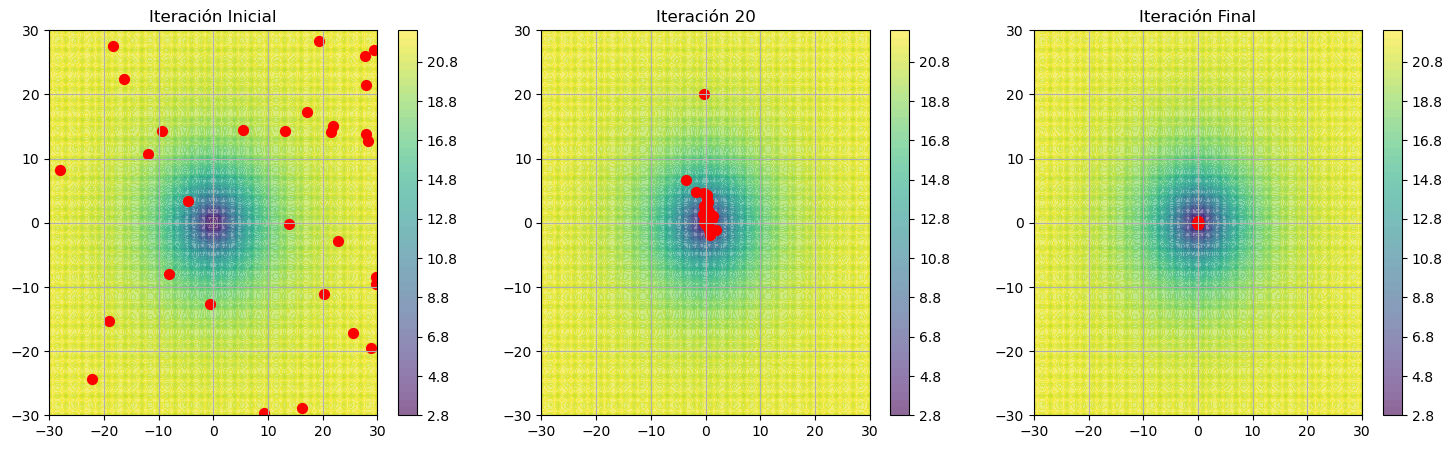

In [25]:
mejor_posicion, mejor_valor, history = pso(funcion_ackley, 2, np.array([-30] * dimensiones), np.array([30] * dimensiones), max_iter=40)

print("Mejor posición:", mejor_posicion)
print("Mejor valor:", mejor_valor)

# Graficar posiciones de partículas en iteraciones seleccionadas junto con la función
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_particles(ax, posiciones, iteracion):
    plot_function(ax, funcion_ackley, lim_inf, lim_sup)
    ax.scatter(posiciones[:, 0], posiciones[:, 1], c='red', marker='o', s=50)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_title(f'Iteración {iteracion}')
    ax.grid(True)

plot_particles(axes[0], history["iter_0"], 'Inicial')
plot_particles(axes[1], history["iter_half"], f'{max_iter // 2}')
plot_particles(axes[2], history["iter_final"], 'Final')

plt.show()


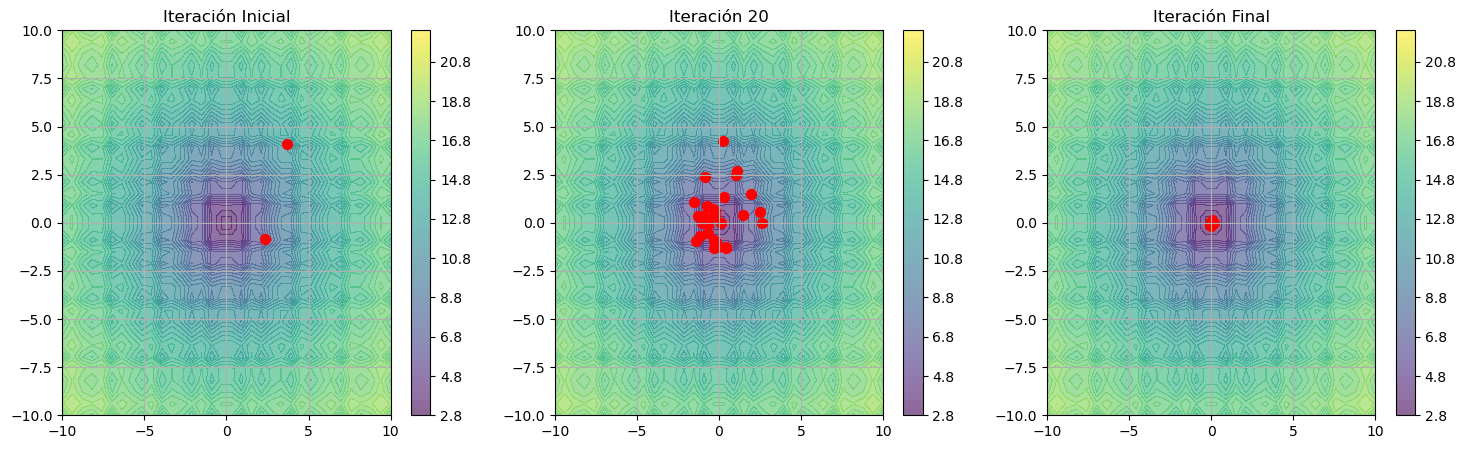

In [26]:
mejor_posicion, mejor_valor, history = pso(funcion_ackley, 2, np.array([-30] * dimensiones), np.array([30] * dimensiones), max_iter=40)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_particles(ax, posiciones, iteracion):
    plot_function(ax, funcion_ackley, lim_inf, lim_sup)
    ax.scatter(posiciones[:, 0], posiciones[:, 1], c='red', marker='o', s=50)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title(f'Iteración {iteracion}')
    ax.grid(True)

plot_particles(axes[0], history["iter_0"], 'Inicial')
plot_particles(axes[1], history["iter_half"], f'{max_iter // 2}')
plot_particles(axes[2], history["iter_final"], 'Final')

plt.show()

## Intervalo de prueba de [-10, 10] y de 2 dimensiones

In [28]:
#La función cuadrática utilizada solo se puede calcular para 2 dimensiones.

#Algoritmo Descenso del Gradiente
df1 = caluculo_result_gradiente(-10, 10, 2, funcion_ackley)

#Algoritmo Estandar PSO con 30 partículas y 100 iteraciones
df2 = calculo_result_enjambre(funcion_ackley,2, 30, 100, -10, 10)

#Algoritmo Paralelizado PSO con 30 partículas y 25 iteraciones por subconjunto (6)
df3 = calculo_paralelizacion(2, -10, 10, 6, 'ackley', 30, 25) 

#Unir dfs
resultado = pd.concat([df1, df2, df3], axis=1)
resultado

,Run,Tiempo_gradiente,valor_optimo_gradiente,Run,Tiempo_estandar,valor_optimo_estandar,Run,Tiempo_parale,valor_optimo_parale
0,1,0.005026,3.574452,1,0.062007,2.993946e-08,1,0.279961,4.440892e-16
1,2,0.002998,3.574452,2,0.061006,4.513656e-09,2,0.267001,4.440892e-16
2,3,0.003003,3.574452,3,0.061992,7.232321e-08,3,0.273998,4.440892e-16
3,4,0.002999,3.574452,4,0.061000,2.396396e-07,4,0.261002,4.440892e-16
4,5,0.002999,3.574452,5,0.059999,2.649415e-08,5,0.267000,4.440892e-16
5,Media,0.003405,3.574452,Media,0.061201,7.458201e-08,Media,0.269792,4.440892e-16


Al ejercutar los algoritmos con la función Ackley se pueden observar varias cosas, primeramente el algoritmo gradiente sigue ejecutándose muy rápido pero al valor que llega es sumamente incorrecto, por lo que la velocidad de ejecución no aporta algo necesario si el resultado está mal. No obstante el algoritmo de ejambre estandar y el paralelizado llegaron a un resultado; el estándar fue más rápido pero es menos preciso, mientras que el paralelizado no fue más rápido pero fue extremadamente preciso el resultado.

## Intervalo de prueba de [-10, 10] y de 10 dimensiones

In [31]:
#La función cuadrática utilizada solo se puede calcular para 2 dimensiones.

#Algoritmo Descenso del Gradiente
df1 = caluculo_result_gradiente(-10, 10, 10, funcion_ackley)

#Algoritmo Estandar PSO con 30 partículas y 100 iteraciones
df2 = calculo_result_enjambre(funcion_ackley,10, 30, 100, -10, 10)

#Algoritmo Paralelizado PSO con 30 partículas y 25 iteraciones por subconjunto (6)
df3 = calculo_paralelizacion(10, -10, 10, 6, 'ackley', 30, 25) 

#Unir dfs
resultado = pd.concat([df1, df2, df3], axis=1)
resultado

,Run,Tiempo_gradiente,valor_optimo_gradiente,Run,Tiempo_estandar,valor_optimo_estandar,Run,Tiempo_parale,valor_optimo_parale
0,1,0.011004,14.531178,1,0.059999,20.000000,1,0.279968,4.440892e-16
1,2,0.011001,14.531178,2,0.061001,20.000034,2,0.258000,4.440892e-16
2,3,0.009997,14.531178,3,0.061002,20.000000,3,0.263003,4.440892e-16
3,4,0.010001,14.531178,4,0.060000,20.000002,4,0.257000,4.440892e-16
4,5,0.008998,14.531178,5,0.060998,20.093064,5,0.258999,4.440892e-16
5,Media,0.010200,14.531178,Media,0.060600,20.018620,Media,0.263394,4.440892e-16


Desde la prueba anterior el algoritmo de gradiente no sirve. Al aumentar las dimensiones a 10 y manteniendo la misma área se evidencia que el modelo PSO estádar se queda corto para poder optimizar pues en los 5 casos se quedó atrapado en un punto crítico local. No obstante, el PSO paralelizado sigue durando más pero el encontrar el punto crítico global fue impecable y recordando que está haciendo 25 iteraciones por partición.

# Evidenciar las capacidades y límites del modelo PSO Paralelizado

## Intervalo total [-100, 100] en 10 dimensiones, 30 particulas y 25 iteraciones por subintervalo

In [35]:
df3 = calculo_paralelizacion(10, -100, 100, 6, 'ackley', 30, 25) 
df3

,Run,Tiempo_parale,valor_optimo_parale
0,1,0.266000,4.440892e-16
1,2,0.262001,4.440892e-16
2,3,0.316009,4.440892e-16
3,4,0.296994,4.440892e-16
4,5,0.295995,4.440892e-16
5,Media,0.287400,4.440892e-16


Solomente hacer notar que el tiempo de ejecución y la precición es casi la misma a pesar que el área de búsqueda aumentó 10 veces

## Intervalo total [-300, 300] en 10 dimensiones

### 30 particulas y 100 iteraciones por subintervalo

In [39]:
df3 = calculo_paralelizacion(10, -300, 300, 6, 'ackley', 30, 25) 
df3

,Run,Tiempo_parale,valor_optimo_parale
0,1,0.283002,20.000000
1,2,0.275997,20.000000
2,3,0.286001,19.999948
3,4,0.296999,20.000124
4,5,0.266001,20.000000
5,Media,0.281600,20.000015


Nótese que para este intervalo, con la cantidad de particulas e iteraciones empleadas el modelo ya no es suficiente para encontrar el punto crítico global y queda atrapado en una local. Por lo que se procede a subir el número de particulas o el número de iteraciones para ver el resultado.

### 8000 particulas y 25 iteraciones por subintervalo

In [42]:
df3 = calculo_paralelizacion(10, -300, 300, 6, 'ackley', 8000, 25) 
df3

,Run,Tiempo_parale,valor_optimo_parale
0,1,5.128988,4.440892e-16
1,2,5.130967,4.440892e-16
2,3,4.969000,4.440892e-16
3,4,4.879780,4.440892e-16
4,5,5.218371,1.999965e+01
5,Media,5.065421,3.999930e+00


Para poder encontrar el punto crítico global en la mayoría de las pruebas fue necesario subir hasta 8000 partículas por subintervalo, probando aparte se subió hasta 10 000 partículas e igualmente en casos no aproximaba bien. Además que el tiempo de ejecución subía considerablemente al aumentar el número de partículas y los resultados no eran tan evidentes como se esperaba.

### 30 particulas y 10000 iteraciones por subintervalo

In [45]:
df3 = calculo_paralelizacion(10, -300, 300, 6, 'ackley', 30, 10000) 
df3

,Run,Tiempo_parale,valor_optimo_parale
0,1,7.441035,19.999347
1,2,7.640429,19.999994
2,3,7.633807,19.999986
3,4,7.356970,19.999853
4,5,8.317056,19.999843
5,Media,7.677859,19.999804


Solo aumentando el número de iteracine no se evidenció mejora en lo absoluto, pues no fue capáz de encontrar el punto crítico global y se quedó atrapado el famoso valor de 20. En una prueba se subió a 100 000 iteraciones por subintervalo y quedó atrapdo en el mismo valor y el tiempo de ejecución subió a 74.71 en promedio por ejecución, lo que no en lo absoluto optimizado.

### 100 particulas y 5000 iteraciones por subintervalo

In [48]:
df3 = calculo_paralelizacion(10, -200, 200, 6, 'ackley', 100, 5000) 
df3

,Run,Tiempo_parale,valor_optimo_parale
0,1,12.309021,4.440892e-16
1,2,12.570005,1.119604e+01
2,3,12.705003,4.440892e-16
3,4,12.232003,4.440892e-16
4,5,12.510036,4.440892e-16
5,Media,12.465214,2.239207e+00


Se puede evidenciar que el aumento de partículas e iteraciones por subintervalo si mejora la precisión del modelo, pero el esfuerzo y recursos invertidos para encontrar algunos puntos globales y que incluso aveces no es demasiado para los resultados que se obtienen. 

# Conclusión

El modélo de optimización por ejambre paralelizado logró lo esperado, que era superar tanto el modelo de gradiente de una librería de python así como el modelo estádar de optimización por ejambre obtenido de una fuente, pero al probar con funciones complejas con muchos puntos críticos, pues en funciones con monotonías mas evidentes, el modelo es ampliamente superado en tiempo de ejecución por otros menos robustos.

Solamente el aumento del número de partículas e iteraciones no muestran un aumento de rendimiento directo, la necesidad de recuersos necesario crece muy rápido comparado con los resultados.

El aumento del intervalo de búsqueda baja considerablemente la efectividad del modelo, por lo que trabaja mejor en intervalos menores a una longitud de 200, es decir con particiones menores o iguales a 33 aproximadamente.

Como recomendación, este modelo se puede hacer mucho más robusto agregando un segundo nivel de búsqueda más acotada al rededor de los puntos locales encontrados y asé aumentar la probabilidades de éxito.